# Essential packages (Numpy, Matplotlib, Scipy)

Python `list`s are not a good way of representing numerical data:

In [66]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [67]:
l * 2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [68]:
l + [1 for i in l]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Numpy `array` to the rescue!

In [69]:
import numpy as np

In [70]:
a = np.array(l)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
type(a)

numpy.ndarray

Another way of constructing a range of numbers in Numpy:

In [72]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy `array`s behave like vectors:

In [73]:
a * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [74]:
a + np.ones_like(a)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

---

### The simplest way of plotting numerical data: `matplotlib`'s `pyplot`:

In [75]:
import matplotlib.pyplot as plt

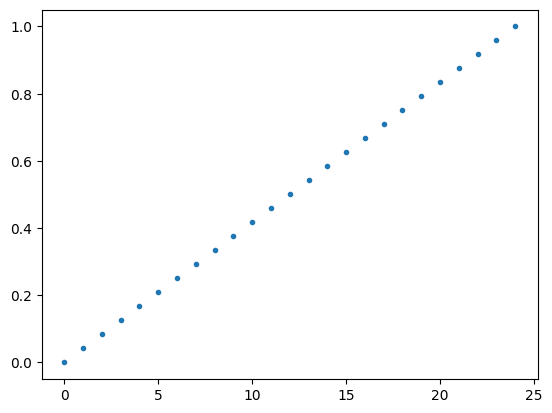

In [76]:
t = np.linspace(0, 1, 25)
plt.plot(t, ".")

### Numpy defines some handy numerical functions:

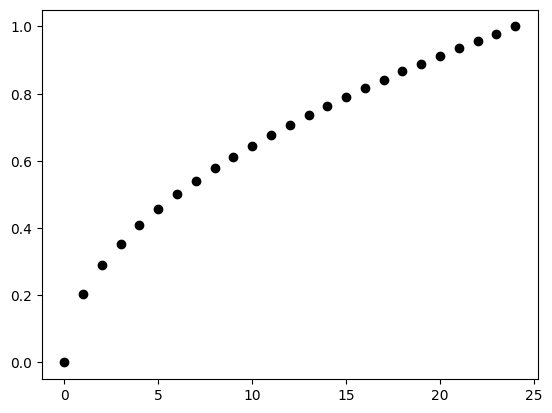

In [77]:
plt.plot(np.sqrt(t), "ko")

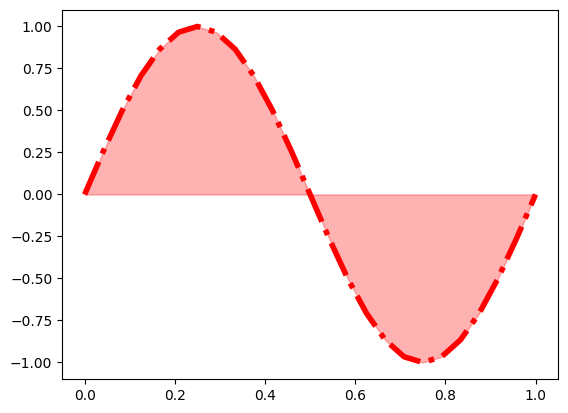

In [78]:
sine = np.sin(2 * np.pi * t)
plt.plot(t, sine, "r-.", lw=4)
plt.fill_between(t, sine, color="r", alpha=0.3)

We access elements of Numpy `array`s the same way we did with `list`s:

In [79]:
sine[:3]

array([0.        , 0.25881905, 0.5       ])

In [80]:
sine[len(sine) // 2:] = 0

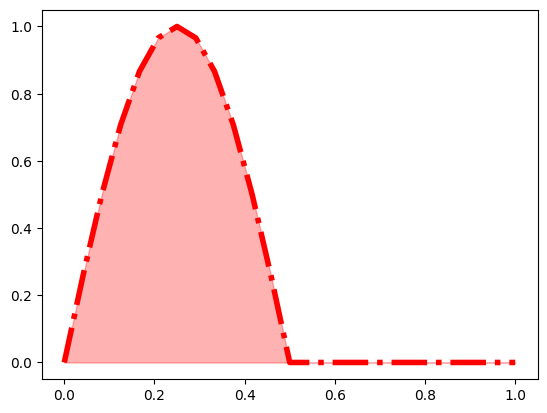

In [81]:
plt.plot(t, sine, "r-.", lw=4)
plt.fill_between(t, sine, color="r", alpha=0.3)

Numpy `array` objects actually have quite a lot of attributes and methods:

In [82]:
sine?

Type:        ndarray
String form:
[0.         0.25881905 0.5        0.70710678 0.8660254  0.96592583
           1.         0.96592583 0.86602 <...>  0.         0.         0.
           0.         0.         0.         0.         0.         0.
           0.        ]
Length:      25
File:        d:\programs\python\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` modul

---

Of course, we are not confined to 1-dimensional `array`s:

In [83]:
noise = np.random.rand(100, 100)
np.min(noise), np.max(noise)

(2.1833595934550587e-06, 0.999672843227228)

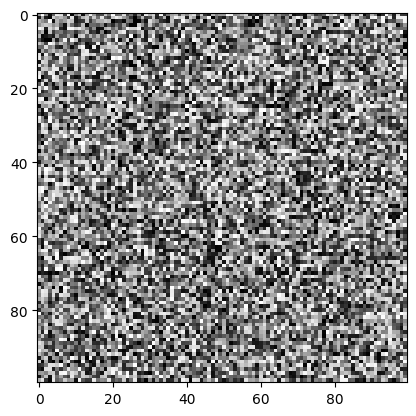

In [84]:
plt.imshow(noise, cmap="gray")

And if we try something a bit more interesting:

In [85]:
width = 100
height = 50

In [86]:
x = np.linspace(-2, 2, width)
y = np.linspace(-1, 1, height)
X, Y = np.meshgrid(x, y)
Z = np.sin(10 * (X**2 + Y**2)) / 10
Z.shape

(50, 100)

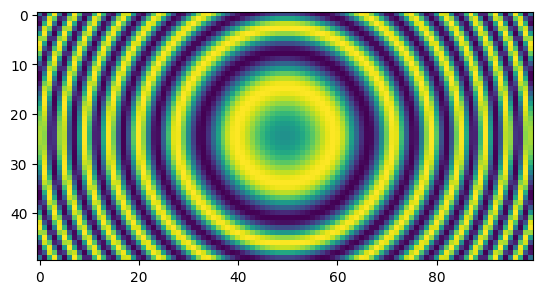

In [87]:
plt.imshow(Z)

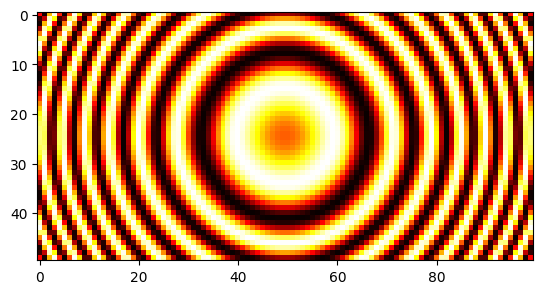

In [88]:
plt.imshow(Z, cmap="hot")

In [89]:
np.min(Z), np.max(Z)

(-0.09999982641650831, 0.09999961596591142)

---

To get the values of `Z` into the usual 8-bit grayscale image range:

In [90]:
Z_image = Z - np.min(Z)
Z_image = (Z_image / np.max(Z_image) * 255).astype(np.uint8)
np.min(Z_image), np.max(Z_image)

(0, 255)

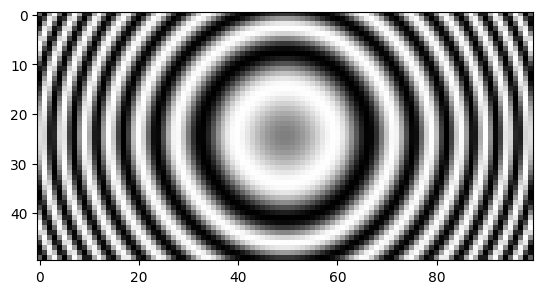

In [91]:
plt.imshow(Z_image, cmap="gray")

In [92]:
import imageio

imageio.v3.imwrite("./data/ripple.png", Z_image)

---

If we look a bit closer at our image objets, we will se that they are actually Numpy `array`s:

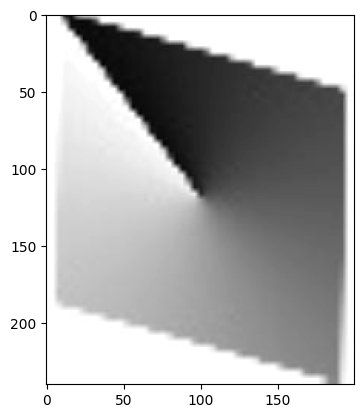

In [93]:
image = imageio.v3.imread("data/image_1.jpg")
plt.imshow(image, cmap="gray")

In [94]:
image.min(), image.max(), image.sum(), image.mean(), image.std()

(23, 255, 8225812, 171.37108333333333, 72.44249878692104)

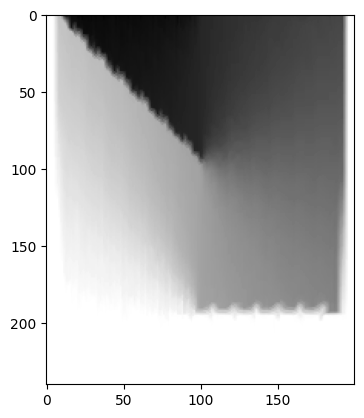

In [95]:
plt.imshow(np.sort(image, axis=0), cmap="gray")

---

## Interpolation & Approximation

In [96]:
from scipy.interpolate import (
    InterpolatedUnivariateSpline,
    interp2d,
    RectBivariateSpline,
    RegularGridInterpolator,
)

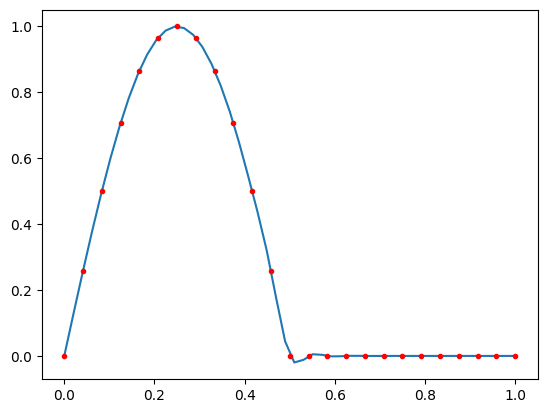

In [97]:
spl = InterpolatedUnivariateSpline(t, sine)
t_new = np.linspace(np.min(t), np.max(t), len(t) * 2)
plt.plot(t_new, spl(t_new))
plt.plot(t, sine, "r.")

Interpolating an image:

In [98]:
old_x = np.arange(image.shape[1])
old_y = np.arange(image.shape[0])

new_x = np.linspace(0, image.shape[1] - 1, image.shape[1] * 2)
new_y = np.linspace(0, image.shape[0] - 1, image.shape[0] * 2)

spline = RectBivariateSpline(old_y, old_x, image, kx=1, ky=1)
new_image = spline(new_y, new_x)

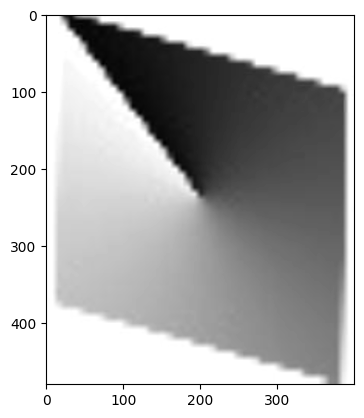

In [99]:
plt.imshow(new_image, cmap="gray")

---

## Differentiation & Integration

In [100]:
dy, dx = np.gradient(new_image, 1)

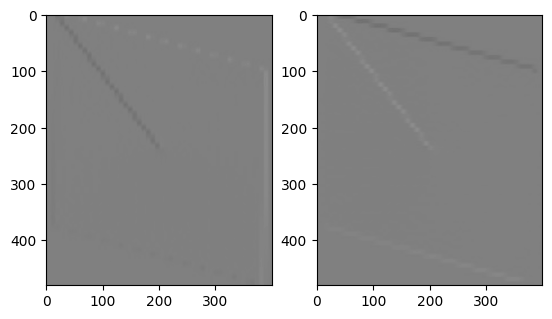

In [101]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(dx, cmap="gray", vmin=-255, vmax=255)
ax[1].imshow(dy, cmap="gray", vmin=-255, vmax=255)

[Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) is often used to find edges.

Applying an operator kernel over an `array` can be achieved by convolution:

In [102]:
from scipy.signal import convolve2d

In [103]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [104]:
dx_sobel = convolve2d(new_image, sobel_x[::-1, ::-1], mode="valid")
dy_sobel = convolve2d(new_image, sobel_y[::-1, ::-1], mode="valid")

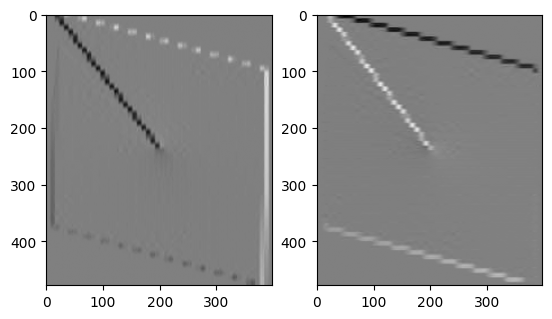

In [105]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(dx_sobel, cmap="gray", vmin=-255, vmax=255)
ax[1].imshow(dy_sobel, cmap="gray", vmin=-255, vmax=255)

Numerical integration can be achieved using `numpy` and `scipy` functions

In [106]:
from scipy.integrate import simps, trapz

In [107]:
phi = np.linspace(0, np.pi / 2, 10)
f_num = np.sin(phi)
S_trapz = trapz(f_num, phi)
S_simps = simps(f_num, phi)

In [108]:
S_trapz, S_simps

(0.9974602317917258, 0.9997648798831116)

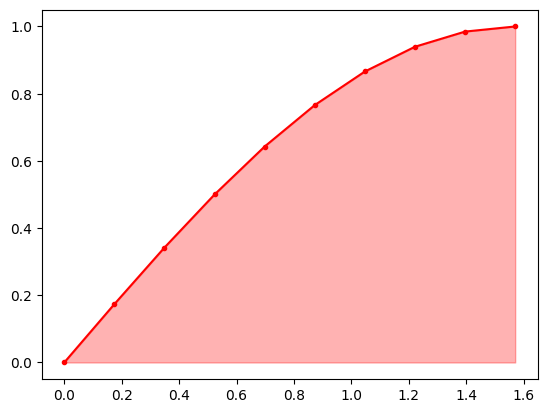

In [109]:
plt.plot(phi, f_num, "r.-")
plt.fill_between(phi, f_num, color="r", alpha=0.3)

Cumulative sum using `cumtrapz` function:

In [110]:
t = np.linspace(0, 7, 10)  # s
a = np.array([3.47, 4.03, 4.36, 4.48, 4.27, 3.78,
             3.19, 2.73, 2.54, 2.53])  # m/s^2

In [111]:
from scipy.integrate import cumtrapz

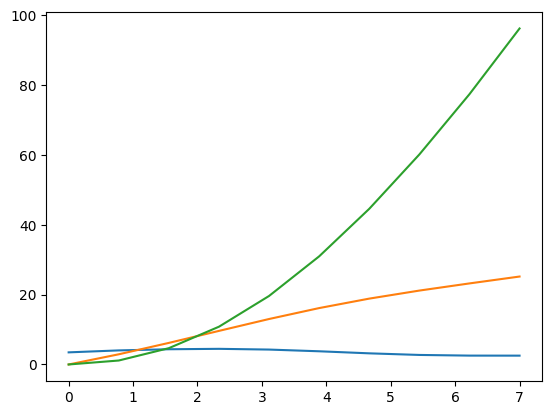

In [112]:
v = cumtrapz(a, t, initial=0)
s = cumtrapz(v, t, initial=0)
plt.plot(t, a)
plt.plot(t, v)
plt.plot(t, s)

---

## Frequency Analysis

In [113]:
import os
import matplotlib.pyplot as plt
import lvm_read

### Load data

Load data from `lvm` file:

In [114]:
file_path = "data/"
filename = os.path.join(file_path, "measurement.lvm")

lvm_data = lvm_read.read(filename)

lvm_data.keys()

dict_keys(['Decimal_Separator', 'Writer_Version', 'Reader_Version', 'Separator', 'Multi_Headings', 'X_Columns', 'Time_Pref', 'Operator', 'Date', 'Time', 0, 1, 2, 3, 'Segments'])

There are three segments in this file. Each segment represents a single measurement.

In [115]:
lvm_data["Segments"]

4

Each segment contains various measurement data.

In [116]:
lvm_data[0].keys()

dict_keys(['Channels', 'Samples', 'Date', 'Time', 'Y_Unit_Label', 'X_Dimension', 'X0', 'Delta_X', 'data', 'Channel names'])

In [117]:
lvm_data[0]["Channel names"]

['X_Value',
 'Force (Trigger)',
 'Acceleration (Trigger)',
 'Voltage (Trigger)',
 'Comment']

Let's read data from all segments and create a new array:

In [118]:
data = np.array([lvm_data[i]["data"] for i in range(lvm_data["Segments"])])

In [119]:
data.shape

(4, 25620, 4)

Save the data in variables:

In [120]:
n = data.shape[1]  # number of samples
dt = lvm_data[0]["Delta_X"][0]  # time step
sampling_frequency = 1 / dt

time = np.arange(n) * dt  # time vector
force = data[:, :, 1]  # force vector
acceleration = data[:, :, 2]  # acceleration vector

(-0.001, 0.01)

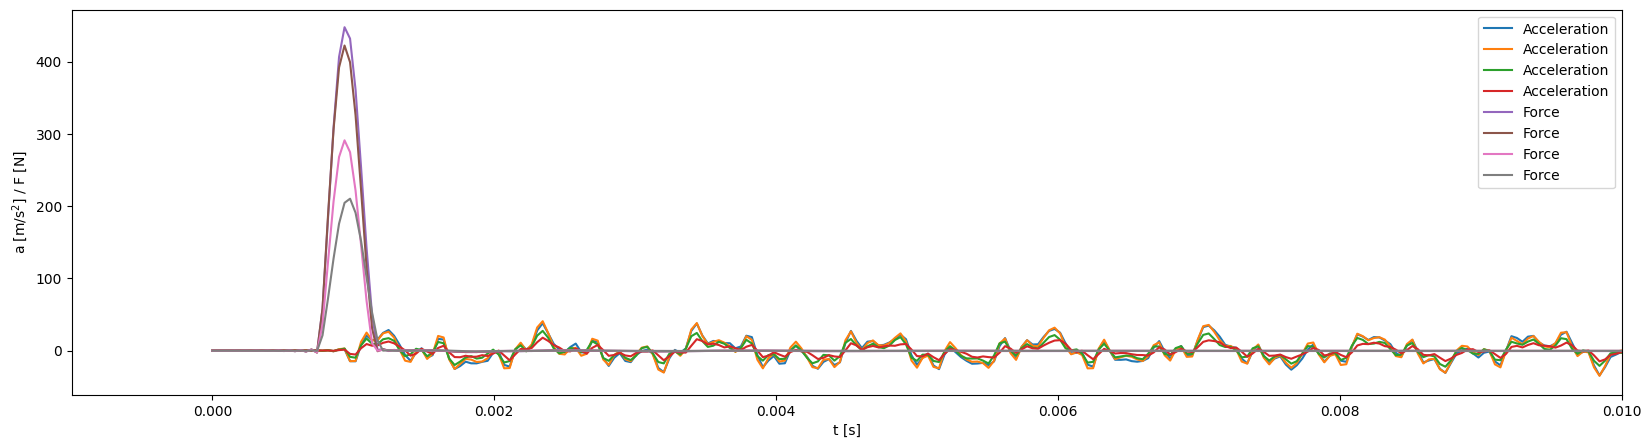

In [121]:
plt.figure(figsize=(20, 5))
plt.plot(time, acceleration.T, label="Acceleration")
plt.plot(time, force.T, label="Force")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("a [m/s$^2$] / F [N]")
plt.xlim(-0.001, 0.01)

## Fast Fourier Transform
Fast Fourier Transform (FFT) is an optimized implementation of **Discrete Fourier Transform**:
$$
A_k = \sum_{m=0}^{n-1}\,a_m\,\exp\left(-2\,\pi\,\mathrm{i}\,\frac{m\,k}{n}\right)
$$

Since all input data are real,  we will use the `np.fft.rfft` function, which expects real inputs and only computes positive frequency spectra.

In order to obtain the correct amplitudes, the output must be appropriately scaled.

In [122]:
Acceleration = np.fft.rfft(acceleration, n=n, axis=1) / n
Force = np.fft.rfft(force, n=n, axis=1) / n

# As we have effectively discarded the negative frequency spectra, the positive frequency components are doubled
Acceleration[:, 1:] *= 2
Force[:, 1:] *= 2

The frequency vector has to be computed as well:

In [123]:
freq = np.fft.rfftfreq(n, dt)

To make the plot more clear, we will use a logarithmic scale on y-axis:

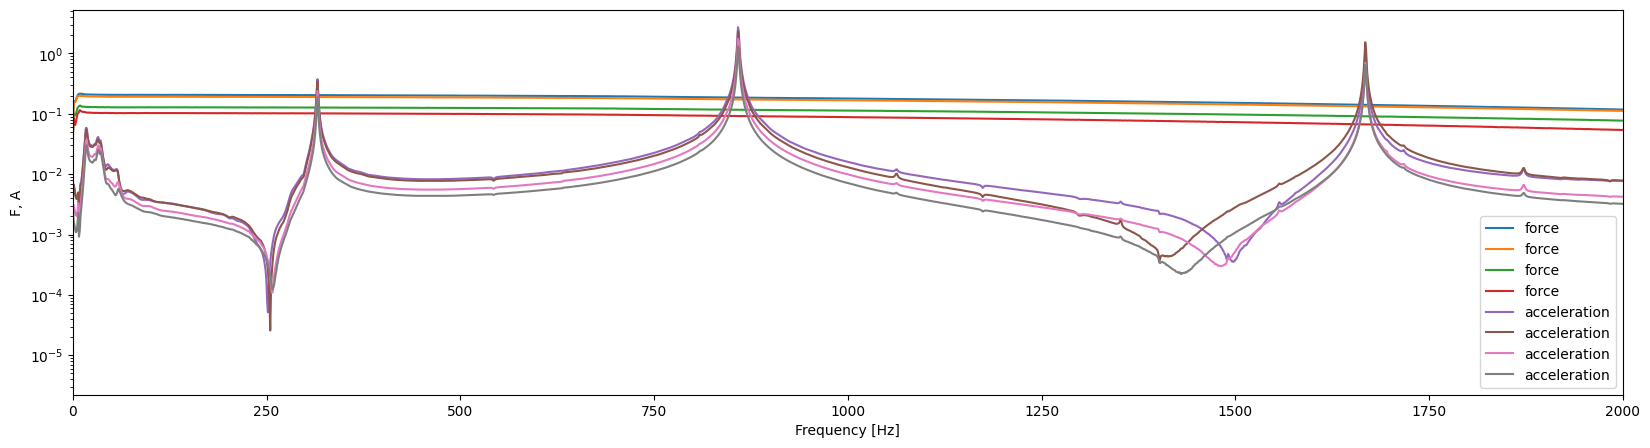

In [124]:
plt.figure(figsize=(20, 5))
plt.semilogy(freq, np.abs(Force).T, label="force")
plt.semilogy(freq, np.abs(Acceleration).T, label="acceleration")
plt.xlim(0, 2000)
plt.xlabel("Frequency [Hz]")
plt.ylabel("F, A")
plt.legend()

## Windows
To reduce the effects of frequency leakage, windowing is often used. 

Leakage is present because the signal is not perfectly periodic.


Different windows are used for different types of the signals:
* Force impact - *force window*
* Impact response - *exponential window*
* Response to continuous excitation - *Hann, Hamming, Bartlett,...*

In [60]:
n = 100
time_windows = np.linspace(0, 1, n)

# Force window
force_w = np.zeros(n)
force_w[: n // 20] = 1

In [61]:
# Exponential window
exponential_w = np.exp(np.log(0.01) * time_windows)

In [62]:
# Other windows
hann = np.hanning(n)
hamming = np.hamming(n)
bartlett = np.bartlett(n)

Text(0, 0.5, 'Window amplitude')

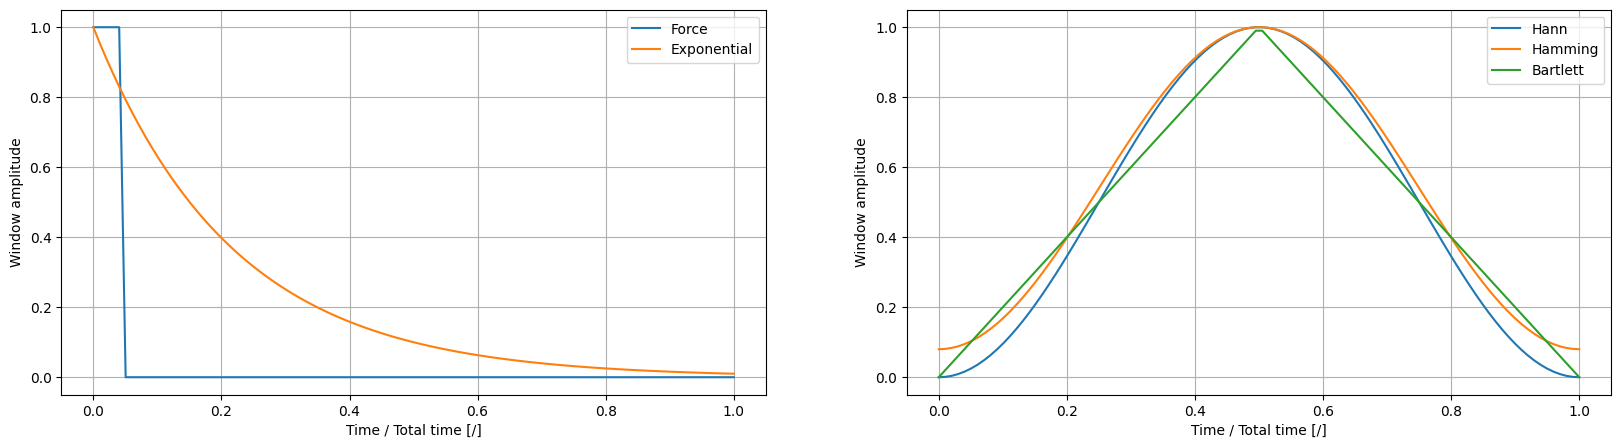

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(time_windows, force_w, label="Force")
ax[0].plot(time_windows, exponential_w, label="Exponential")
ax[1].plot(time_windows, hann, label="Hann")
ax[1].plot(time_windows, hamming, label="Hamming")
ax[1].plot(time_windows, bartlett, label="Bartlett")

ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()

ax[0].set_xlabel("Time / Total time [/]")
ax[0].set_ylabel("Window amplitude")
ax[1].set_xlabel("Time / Total time [/]")
ax[1].set_ylabel("Window amplitude")

## Welch’s method

The method is implemented in `scipy` library in [`scipy.signal.welch()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html) and  [`scipy.signal.csd()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.csd.html).



The basic idea of the method:
* The time signal is divided into `nperseg`-length segments that overlap by `noverlap` points,
* Each of the segments is windowed,
* The power spectra (or PSD) of each windowed segment are computed,
* The results of all segments are averaged.

Overlapping of the segments preserve the information from the signal that is otherwise lost due to low influence at the segment edges (caused by most windows).

Text(0, 0.5, 'Window amplitude')

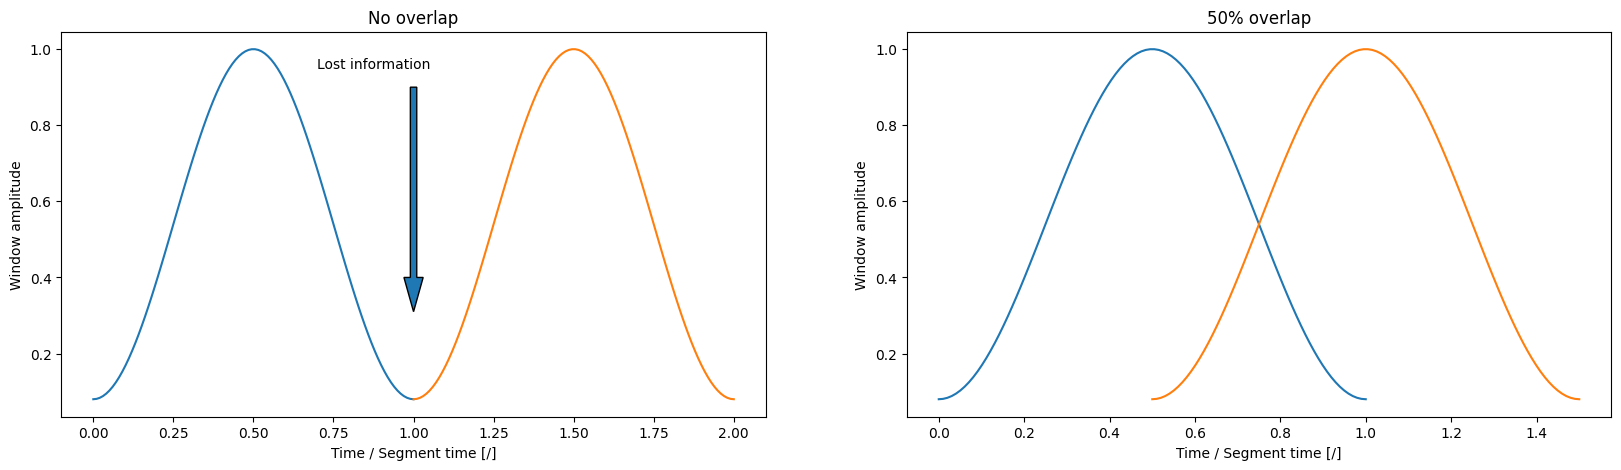

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(time_windows, hamming)
ax[0].plot(time_windows + 1, hamming)
ax[1].plot(time_windows, hamming)
ax[1].plot(time_windows + 0.5, hamming)
ax[0].text(0.7, 0.95, "Lost information")
ax[0].arrow(1, 0.9, 0, -0.5, width=0.02)

ax[0].set_title("No overlap")
ax[1].set_title("50% overlap")

ax[0].set_xlabel("Time / Segment time [/]")
ax[0].set_ylabel("Window amplitude")
ax[1].set_xlabel("Time / Segment time [/]")
ax[1].set_ylabel("Window amplitude")